# How Well do Jobs and Skills Pay ?

### Methodology

1. Create a table displaying the median salary for all data jobs
2. Find median salary per skill for all data jobs
3. Obtain tables for the highest paying / most in-demand skills (Top 10)
4. Create charts for the highest paying / most in-demand skills (Top 10)

NOTE: all explorations will focus on the following: 
- Roles: 
  - Data Analyst
  - Data Engineer
  - Data Scientist
- Countries: 
  - United Kingdom
  - United States
  - India

### Import Libraries

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Vikram Kapoor\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Part 1 - Create a Table Displaying the Median Salary for all Data Jobs

### Filter Datasets for Roles and Countries

In [2]:
# List Containing Job Roles: Data Analyst, Data Engineer, Data Science
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# List Containing Countries: United Kingdom, United States, India
countries = ['United Kingdom', 'United States', 'India']

# Filter the Dataset for Job Roles and Countries
df_job_ctry = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'].isin(countries))]

# Filter for US and Remove NAs in salary_year_avg
df_job_ctry = df_job_ctry.dropna(subset = ['salary_year_avg'])

### Create Table Median Salaries for the Data Jobs in Each Country

In [3]:
# Use groupby() to get the Median sSalary
df_med_sal = df_job_ctry.groupby(['job_country', 'job_title_short'])['salary_year_avg'].median().sort_values(ascending = False).to_frame()

# Reset Index for Proper Filtering and 
df_med_sal = df_med_sal.reset_index()

df_med_sal

,job_country,job_title_short,salary_year_avg
0,India,Data Engineer,147500.0
1,United States,Data Scientist,130000.0
2,United States,Data Engineer,125000.0
3,India,Data Scientist,114008.0
4,United Kingdom,Data Engineer,110000.0
5,United Kingdom,Data Scientist,105300.0
6,India,Data Analyst,100500.0
7,United States,Data Analyst,90000.0
8,United Kingdom,Data Analyst,87750.0


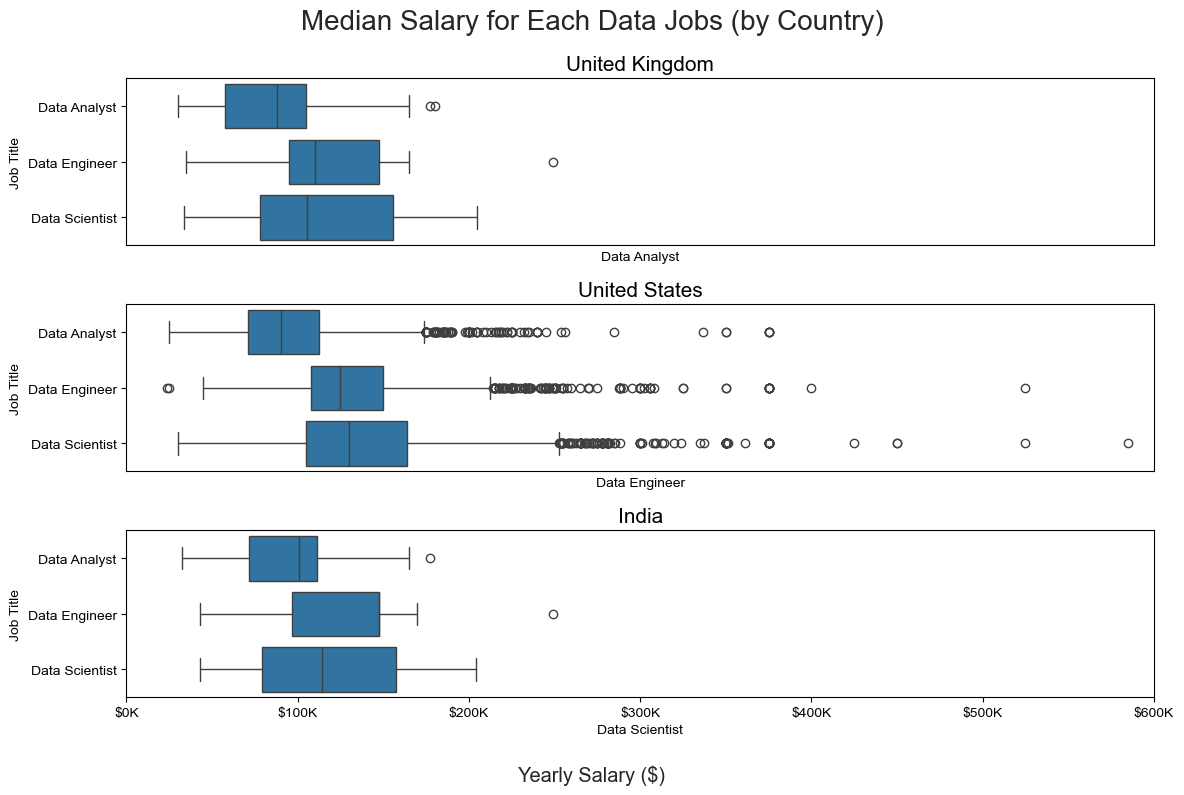

In [4]:
# Setup Figure
fig, ax = plt.subplots(len(countries), 1, figsize = (12, 8))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, country in enumerate(countries):

# Filters and Orders the Skills Count Table Using the Loop to Adjust the Filters Accordingly 
    df_plot = df_job_ctry[df_job_ctry['job_country'] == country]

# Creation of the Chart Using Seaborn 
    sns.boxplot(data = df_plot,
                x = 'salary_year_avg',
                y = 'job_title_short', 
                ax = ax[i],
                order = job_titles
                )

# Set Limit of X-Axis
    ax[i].set_xlim(0, 600000)

# Adjust X-Axis Format
    ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
    ax[i].xaxis.set_major_formatter(ticks_x)

# Create Chart Titles for Top Row Only to Distinguish Column for Countries
    ax[i].set_title(countries[i], fontsize = 15)
        
# Creates X-Axis Titles for All Charts
    ax[i].set_xlabel(job_titles[i])

# Creates y-Axis Title for Middle Charts 
    ax[i].set_ylabel('Job Title')

# Removes the X-Axis Scale for Top and Middle Row Charts
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Median Salary for Each Data Jobs (by Country)', fontsize = 20)
fig.supxlabel('Yearly Salary ($)')
plt.tight_layout()
plt.show()


## Part 2 - Find Median Salary Per Skill for all Data Jobs

In [5]:
# Recall Job Country Table
df_job_ctry.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


In [6]:
# Explode job_skills
df_skills_exp = df_job_ctry.explode('job_skills')

In [7]:
# Groupby() to Obtain Count of Job Skill and Median Average Yearly Salary
df_med_sal = df_skills_exp.groupby(['job_country','job_title_short','job_skills'])['salary_year_avg'].agg(['count', 'median'])

# Reset the Index to Allow Filtering
df_med_sal = df_med_sal.reset_index()

df_med_sal

,job_country,job_title_short,job_skills,count,median
0,India,Data Analyst,airflow,2,138087.5
1,India,Data Analyst,alteryx,3,64800.0
2,India,Data Analyst,aws,12,79200.0
3,India,Data Analyst,azure,15,93600.0
4,India,Data Analyst,bash,2,111175.0
...,...,...,...,...,...
1007,United States,Data Scientist,watson,10,213500.0
1008,United States,Data Scientist,windows,72,115000.0
1009,United States,Data Scientist,word,157,124400.0
1010,United States,Data Scientist,yarn,4,137500.0


## Step 3 - Obtain Tables the Highest Paying / Most In-Demand Skills (Top 10)

### Top 10 Highest Paying Skills (Table)

In [8]:
# Filter for India and Data Analyst Roles
df_da_ind_top_pay = df_med_sal[(df_med_sal['job_country'] == 'India') & (df_med_sal['job_title_short'] == 'Data Analyst')]

# Sort the Values and Obtain the Top 10
df_da_ind_top_pay = df_da_ind_top_pay.sort_values('median', ascending = False).head(10)

df_da_ind_top_pay

,job_country,job_title_short,job_skills,count,median
47,India,Data Analyst,postgresql,1,165000.0
50,India,Data Analyst,pyspark,1,165000.0
24,India,Data Analyst,gitlab,1,165000.0
32,India,Data Analyst,linux,1,165000.0
38,India,Data Analyst,mysql,1,165000.0
21,India,Data Analyst,gdpr,2,163782.0
36,India,Data Analyst,mongodb,6,163782.0
58,India,Data Analyst,scala,3,163782.0
39,India,Data Analyst,neo4j,1,163782.0
10,India,Data Analyst,databricks,3,163782.0


NOTE: This can be Repeated for all the Other Country and Data Job Combinations

### Top 10 Most In-Demand Skills (Table)

In [9]:
# Filter for India and Data Analyst Roles
df_da_ind_skills = df_med_sal[(df_med_sal['job_country'] == 'India') & (df_med_sal['job_title_short'] == 'Data Analyst')]

# Sort Values for Top 10 Most Common Skills
df_da_ind_skills = df_da_ind_skills.sort_values('count', ascending = False).head(10)

# Sort Salaries from Highest to Lowest for Plotting Visuals
df_da_ind_skills = df_da_ind_skills.sort_values('median', ascending = False)

df_da_ind_skills

,job_country,job_title_short,job_skills,count,median
48,India,Data Analyst,power bi,17,111175.0
64,India,Data Analyst,spark,11,111175.0
72,India,Data Analyst,tableau,20,108087.5
17,India,Data Analyst,excel,39,98500.0
67,India,Data Analyst,sql,46,96050.0
51,India,Data Analyst,python,36,96050.0
3,India,Data Analyst,azure,15,93600.0
54,India,Data Analyst,r,18,79200.0
2,India,Data Analyst,aws,12,79200.0
43,India,Data Analyst,oracle,11,79200.0


NOTE: This can be Repeated for all the Other Country and Data Job Combinations

## Step 4 - Visualise the Highest Paying / Most In-Demand Skills (Top 10)

### Median Salaries of Highest Paying Skills (by Country & Job Title)

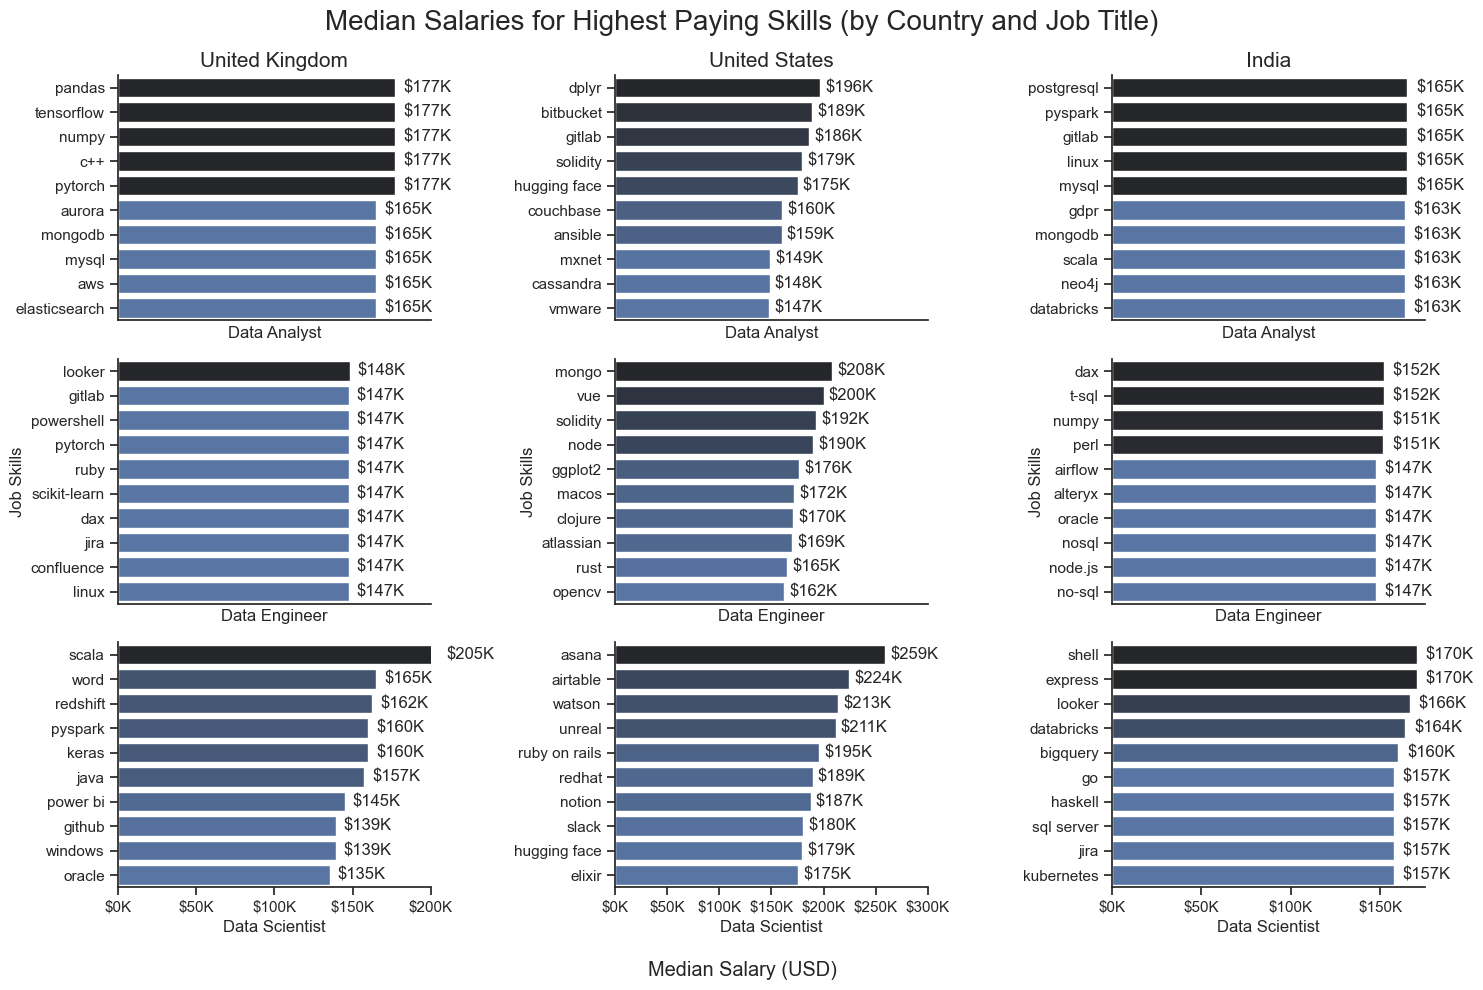

In [10]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters and Orders the Skills Count Table Using the Loop to Adjust the Filters Accordingly 
        df_plot = df_med_sal[(df_med_sal['job_country'] == country) & (df_med_sal['job_title_short'] == job_title)]
        df_plot = df_plot.sort_values('median', ascending = False).head(10)

# Creation of the Chart Using Seaborn
        sns.barplot(
            data = df_plot,
            x = 'median',
            y = 'job_skills',
            ax = ax[i, j],
            hue = 'median',
            palette = 'dark:b_r',
            legend = False
    )

# Sets Limits for X-Axis to Extend To (To Scale for Each Country)
        ax[i, 0].set_xlim(0, 200000)
        ax[i, 1].set_xlim(0, 300000)
        ax[i, 2].set_xlim(0, 175000)

# Removes the X-Axis Scale for Top and Middle Row Charts
        if i != len(job_titles) - 1:
            ax[i, j].set_xticks([])

# Adds Numbers to Side of Bar for Clarity (No Need for Naked Eye Check)
        for n, v in enumerate(df_plot['median']):
            ax[i, j].text(v + 5000, n, f'${int(v/1000)}K', va = 'center')

# Makes X-Axis in Specific Format
        ax[i, j].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Create Chart Titles for Top Row Only to Distinguish Column for Countries
        ax[0, j].set_title(countries[j], fontsize = 15)

# Creates y-Axis Title for Middle Charts 
        if i == 1:
            ax[i, j].set_ylabel('Job Skills')
        else:
            ax[i, j].set_ylabel('')

# Creates x-Axis Titles for All Charts
        ax[i, j].set_xlabel(job_titles[i])

sns.despine()
fig.suptitle('Median Salaries for Highest Paying Skills (by Country and Job Title)', fontsize = 20)
fig.supxlabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

### Median Salaries of the Most In-Demand Skills (by Country & Job Title)

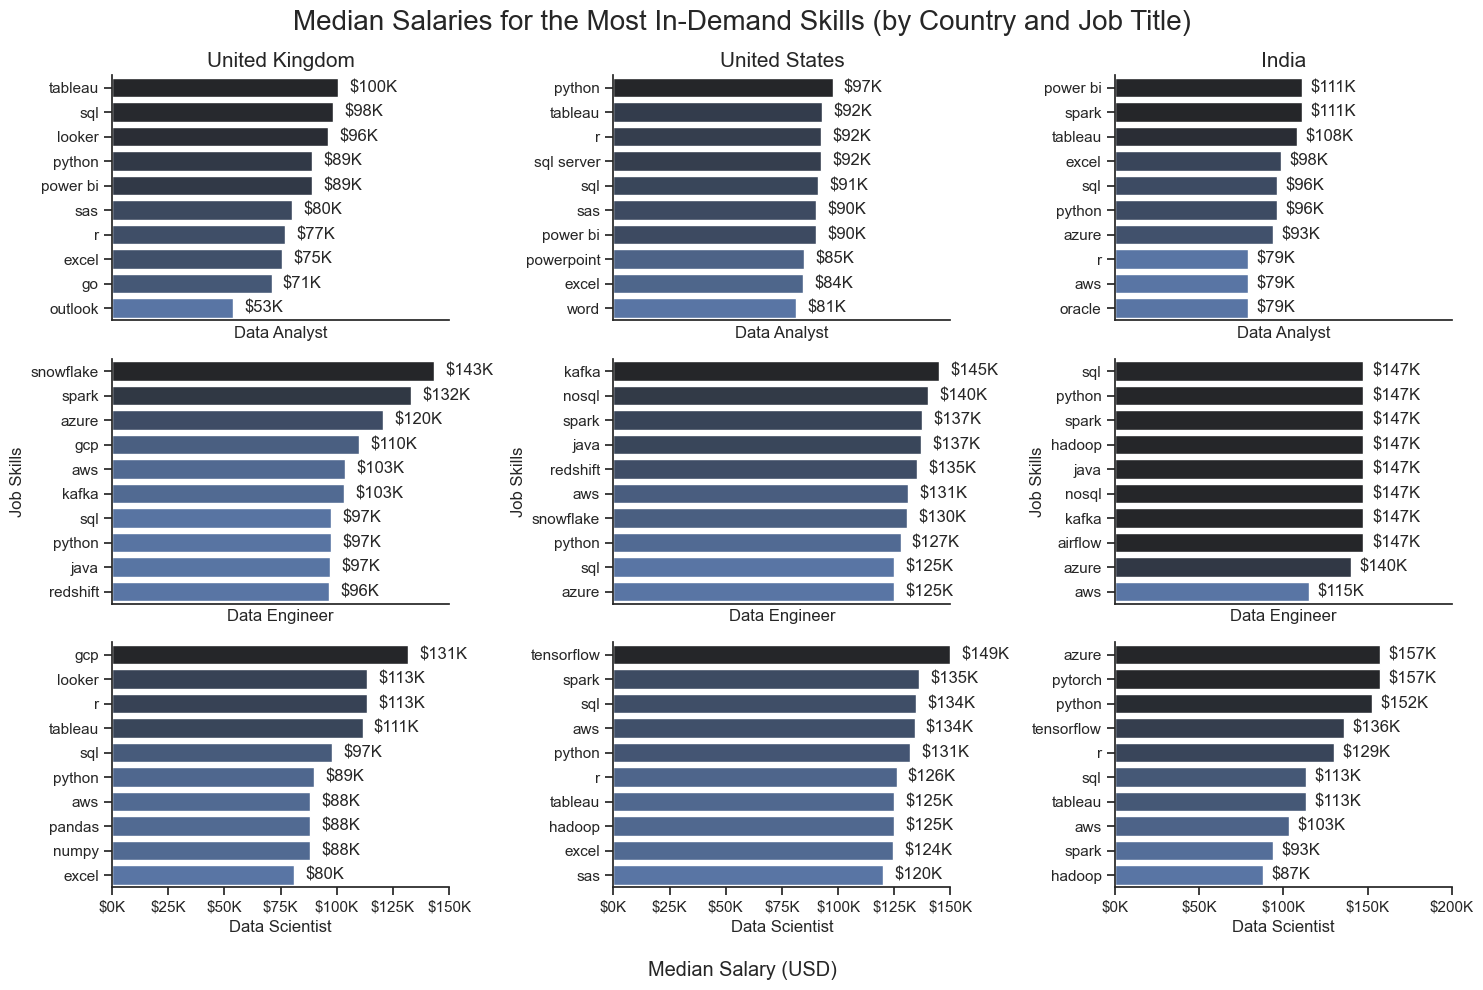

In [11]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters and Orders the Skills Count Table Using the Loop to Adjust the Filters Accordingly 
        df_plot = df_med_sal[(df_med_sal['job_country'] == country) & (df_med_sal['job_title_short'] == job_title)]        
        df_plot = df_plot.sort_values('count', ascending = False).head(10)
        df_plot = df_plot.sort_values('median', ascending = False)

# Creation of the Chart Using Seaborn
        sns.barplot(
            data = df_plot,
            x = 'median',
            y = 'job_skills',
            ax = ax[i, j],
            hue = 'median',
            palette = 'dark:b_r',
            legend = False
    )

# Sets Limits for X-Axis to Extend To (To Scale for Each Country)
        ax[i, 0].set_xlim(0, 150000)
        ax[i, 1].set_xlim(0, 150000)
        ax[i, 2].set_xlim(0, 200000)

# Removes the X-Axis Scale for Top and Middle Row Charts
        if i != len(job_titles) - 1:
            ax[i, j].set_xticks([])

# Adds Numbers to Side of Bar for Clarity (No Need for Naked Eye Check)
        for n, v in enumerate(df_plot['median']):
            ax[i, j].text(v + 5000, n, f'${int(v/1000)}K', va = 'center')

# Makes X-Axis in Specific Format
        ax[i, j].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Create Chart Titles for Top Row Only to Distinguish Column for Countries
        ax[0, j].set_title(countries[j], fontsize = 15)

# Creates y-Axis Title for Middle Charts 
        if i == 1:
            ax[i, j].set_ylabel('Job Skills')
        else:
            ax[i, j].set_ylabel('')

# Creates x-Axis Titles for All Charts
        ax[i, j].set_xlabel(job_titles[i])

sns.despine()
fig.suptitle('Median Salaries for the Most In-Demand Skills (by Country and Job Title)', fontsize = 20)
fig.supxlabel('Median Salary (USD)')
plt.tight_layout()
plt.show()